In [26]:
from pandas_datareader import data as pdr
import yfinance as yf
import time
import datetime

import matplotlib.pyplot as plt
import pandas_datareader.data as wb 

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
yf.pdr_override()

In [27]:
issuer_stock_codes = 'BYAN.JK'

In [28]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=5*365)
data = pdr.get_data_yahoo(issuer_stock_codes, start=start_date, end=end_date.strftime("%Y-%m-%d"))
high9 = data.High.rolling(9).max()
Low9 = data.High.rolling(9).min()   
high26 = data.High.rolling(26).max()
Low26 = data.High.rolling(26).min()
high52 = data.High.rolling(52).max()
Low52 = data.High.rolling(52).min()

data['tenkan_sen'] = (high9 + Low9) / 2
data['kijun_sen'] = (high26 + Low26) / 2
data['senkou_span_a'] = ((data['tenkan_sen'] + data['kijun_sen']) / 2).shift(26) 
data['senkou_span_b'] = ((high52 + Low52) / 2).shift(26)
data['chikou'] = data.Close.shift(-26)
data = data.iloc[26:]

[*********************100%%**********************]  1 of 1 completed


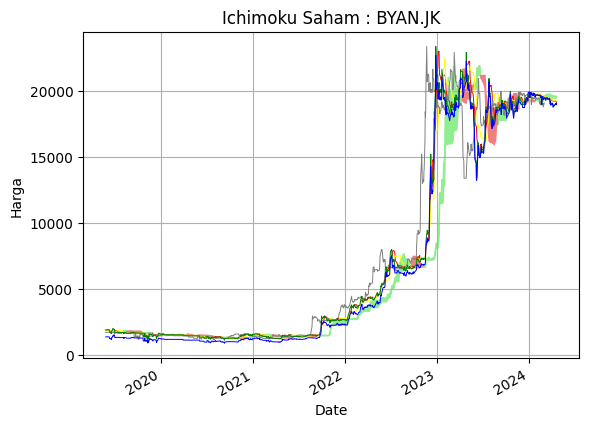

<Figure size 640x480 with 0 Axes>

In [29]:
plt.plot(data.index, data['tenkan_sen'], lw=0.7, color='red')
plt.plot(data.index, data['kijun_sen'], lw=0.7, color='yellow')
plt.plot(data.index, data['chikou'], lw=0.7, color='grey')
plt.plot(data.index, data['Close'], lw=0.7, color='green')
plt.title("Ichimoku Saham : " + str(issuer_stock_codes))
plt.ylabel("Harga")
kumo = data['Adj Close'].plot(lw=0.7, color='blue')
kumo.fill_between(data.index, data.senkou_span_a, data.senkou_span_b, where= data.senkou_span_a >= data.senkou_span_b, color='lightgreen')
kumo.fill_between(data.index, data.senkou_span_a, data.senkou_span_b, where= data.senkou_span_a < data.senkou_span_b, color='lightcoral')
plt.grid()  
# plt.savefig(f'plot_{issuer_stock_codes}.png')
plt.show()
plt.clf()

In [30]:
print ("\nKode Emiten : ", issuer_stock_codes)
print("Close Price:", data['Close'].iloc[-1])
print("tenkan_sen:", data['tenkan_sen'].iloc[-1])
print("kijun_sen:", data['kijun_sen'].iloc[-1])
print("senkou_span_a:", data['senkou_span_a'].iloc[-1])
print("senkou_span_b:", data['senkou_span_b'].iloc[-1])


Kode Emiten :  BYAN.JK
Close Price: 19100.0
tenkan_sen: 19162.5
kijun_sen: 19275.0
senkou_span_a: 19606.25
senkou_span_b: 19500.0


In [31]:
######################################## SEKAN_SEN FACTOR
# Prepare data for linear regression
tenkan_sen = data['tenkan_sen']
x = np.array(range(len(tenkan_sen))).reshape(-1, 1)
y = tenkan_sen.values.reshape(-1, 1)

# Perform linear regression
model = LinearRegression()
model.fit(x, y)

# Get the slope of the line
slope = model.coef_[0]

# Determine the trend
if slope > 0:
    print("The Tenkan-Sen is in an uptrend.")
elif slope < 0:
    print("The Tenkan-Sen is in a downtrend.")
else:
    print("The Tenkan-Sen is moving sideways.")

The Tenkan-Sen is in an uptrend.


In [32]:
######################################## KIJUN_SEN FACTOR
# Get the last closing price and the last Kijun-Sen value
last_close = data['Close'].iloc[-1]
last_kijun_sen = data['kijun_sen'].iloc[-1]

# Determine the trend based on the position of the closing price relative to the Kijun-Sen line
if last_close > last_kijun_sen:
    print("The market is in an upward trend.")
elif last_close < last_kijun_sen:
    print("The market is in a downward trend.")
else:
    print("The market is moving sideways.")

The market is in a downward trend.


In [33]:
######################################## SENKOU_SEN (KUMO) FACTOR
# Get the last closing price and the last Senkou Span A and B values
last_close = data['Close'].iloc[-1]
last_senkou_span_a = data['senkou_span_a'].iloc[-1]
last_senkou_span_b = data['senkou_span_b'].iloc[-1]

# Determine the market trend and potential price movements based on the position of the closing price relative to the Senkou Span A and B lines
if last_close > last_senkou_span_a and last_senkou_span_a > last_senkou_span_b:
    print("Status: Uptrend")
elif last_close < last_senkou_span_a and last_senkou_span_a < last_senkou_span_b:
    print("Status: Downtrend")
elif last_close < last_senkou_span_b and last_senkou_span_a > last_senkou_span_b:
    print("Status: Will Dump")
elif last_close > last_senkou_span_b and last_senkou_span_a < last_senkou_span_b:
    print("Status: Will Pump")
elif last_senkou_span_b < last_close < last_senkou_span_a and last_senkou_span_a > last_senkou_span_b:
    print("Status: Uptrend and Will Bounce Up")
elif last_senkou_span_b < last_close < last_senkou_span_a and last_senkou_span_a < last_senkou_span_b:
    print("Status: Downtrend and Will Bounce Down")

Status: Will Dump


In [34]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# # Add the 'trend' column to the dataframe
# df['trend'] = df['Close'].diff().shift(-1)
# df['trend'] = df['trend'].apply(lambda x: 1 if x > 0 else -1)

# # Define features and labels
# features = df[['tenkan_sen', 'kijun_sen', 'senkou_span_a', 'senkou_span_b']]
# labels = df['trend']

# # Split the data into training and testing sets
# features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# # Create and train the model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(features_train, labels_train)

# # Make predictions on the test set
# predictions = model.predict(features_test)

# # Evaluate the model
# print(classification_report(labels_test, predictions))

# # Now you can use the model to predict trends based on current values
# current_tenkan_sen = data['tenkan_sen'].iloc[-1]
# current_kijun_sen = data['kijun_sen'].iloc[-1]
# current_senkou_span_a = data['senkou_span_a'].iloc[-1]
# current_senkou_span_b = data['senkou_span_b'].iloc[-1]

# current_values = pd.DataFrame([[current_tenkan_sen, current_kijun_sen, current_senkou_span_a, current_senkou_span_b]], columns=['tenkan_sen', 'kijun_sen', 'senkou_span_a', 'senkou_span_b'])
# current_trend_prediction = model.predict(current_values)

# print("Predicted trend based on current values: ", current_trend_prediction)

In [47]:
# Step 1: Import the necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Step 2: Define features and labels
features = data['tenkan_sen'].values.reshape(-1, 1)  # Use the historical values of the Tenkan-Sen line as features
df = data.copy()  # Explicitly create a copy of 'data'
df['trend'] = df['Close'].diff().shift(-1)
df['trend'] = df['trend'].apply(lambda x: 1 if x > 0 else -1)
labels = df['trend'].values  # Use the closing price trend as labels

# Step 3: Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 4: Train the machine learning model
model = RandomForestClassifier(random_state=42)
model.fit(features_train, labels_train)

# Step 5: Evaluate the model's performance
predictions = model.predict(features_test)
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate the percentage accuracy of the prediction that the closing price trend will rise when the Tenkan-Sen line is rising
rising_trend_indices = rising_trend_indices = (features_test.flatten()[:-1] < features_test.flatten()[1:]).nonzero()[0]
correct_predictions = (predictions[rising_trend_indices] == 1).sum()
percentage_accuracy = correct_predictions / len(rising_trend_indices) * 100

print(f"Percentage Accuracy of Predicting Rising Trend: {percentage_accuracy}%")


Accuracy: 0.6443514644351465
Precision: 0.543859649122807
Recall: 0.34444444444444444
F1-score: 0.4217687074829932
Percentage Accuracy of Predicting Rising Trend: 19.35483870967742%


In [45]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features and labels
features = np.column_stack((data['Close'], data['kijun_sen']))
labels = np.where(data['Close'] > data['kijun_sen'], 1, 0)

# Split data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train the machine learning model
model = RandomForestClassifier(random_state=42)
model.fit(features_train, labels_train)

# Make predictions on the testing set
predictions = model.predict(features_test)

# Evaluate the model's performance
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

# Calculate the percentage accuracy of the prediction
percentage_accuracy = accuracy * 100

# Print the evaluation metrics and percentage accuracy
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(f"Percentage Accuracy of Predicting Rising Trend: {percentage_accuracy}%")


Accuracy: 0.9581589958158996
Precision: 0.9326923076923077
Recall: 0.97
F1-score: 0.9509803921568627
Percentage Accuracy of Predicting Rising Trend: 95.81589958158996%


In [54]:
# Step 1: Import the necessary libraries and modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Step 2: Define features and labels
features = np.array([df['Close'], df['senkou_span_a'], df['senkou_span_b']]).T
labels = np.array(df['trend'])

# Step 3: Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 4: Train the machine learning model
model = RandomForestClassifier(random_state=42)
model.fit(features_train, labels_train)

# Step 5: Evaluate the model's performance
predictions = model.predict(features_test)
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

# Step 6: Calculate the accuracy of predictions for each market condition
# Define the conditions for each market trend
uptrend_condition = (df['Close'] > df['senkou_span_a']) & (df['senkou_span_a'] > df['senkou_span_b'])
downtrend_condition = (df['Close'] < df['senkou_span_a']) & (df['senkou_span_a'] < df['senkou_span_b'])
dump_condition = (df['Close'] < df['senkou_span_b']) & (df['senkou_span_a'] > df['senkou_span_b'])
pump_condition = (df['Close'] > df['senkou_span_b']) & (df['senkou_span_a'] < df['senkou_span_b'])
bouncing_up_condition = ((df['senkou_span_b'] < df['Close']) & (df['Close'] < df['senkou_span_a'])) & (df['senkou_span_a'] > df['senkou_span_b'])
bouncing_down_condition = ((df['senkou_span_b'] > df['Close']) & (df['Close'] > df['senkou_span_a'])) & (df['senkou_span_a'] < df['senkou_span_b'])

# Calculate the percentage accuracy for each condition
uptrend_accuracy = accuracy_score(labels[uptrend_condition], model.predict(features[uptrend_condition])) * 100
downtrend_accuracy = accuracy_score(labels[downtrend_condition], model.predict(features[downtrend_condition])) * 100
dump_accuracy = accuracy_score(labels[dump_condition], model.predict(features[dump_condition])) * 100
pump_accuracy = accuracy_score(labels[pump_condition], model.predict(features[pump_condition])) * 100
bouncing_up_accuracy = accuracy_score(labels[bouncing_up_condition], model.predict(features[bouncing_up_condition])) * 100
bouncing_down_accuracy = accuracy_score(labels[bouncing_down_condition], model.predict(features[bouncing_down_condition])) * 100

# Print the results
print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Percentage Accuracy for Each Market Condition:")
print(f"Uptrend Accuracy: {uptrend_accuracy}%")
print(f"Downtrend Accuracy: {downtrend_accuracy}%")
print(f"Dump Accuracy: {dump_accuracy}%")
print(f"Pump Accuracy: {pump_accuracy}%")
print(f"Bouncing Up Accuracy: {bouncing_up_accuracy}%")
print(f"Bouncing Down Accuracy: {bouncing_down_accuracy}%")


Model Performance:
Accuracy: 0.6861924686192469
Precision: 0.6
Recall: 0.5
F1-score: 0.5454545454545454
Percentage Accuracy for Each Market Condition:
Uptrend Accuracy: 94.08450704225352%
Downtrend Accuracy: 93.02325581395348%
Dump Accuracy: 90.32258064516128%
Pump Accuracy: 87.87878787878788%
Bouncing Up Accuracy: 91.66666666666666%
Bouncing Down Accuracy: 95.34883720930233%
